# Quantum Annealing

Implementing a Hamiltonian $H = -500\sigma^Z_1\sigma^Z_2-0.3\sigma^Z_3-0.75\sigma^Z_1$

In [1]:
import itertools
import numpy as np
import scipy
import socket
import subprocess
import time
import matplotlib.pyplot as plt
import dimod

Z = np.array([[1, 0], [0, -1]])
IZ = np.kron(np.eye(2), Z)
ZZ = np.kron(Z, Z)
ZI = np.kron(Z, np.eye(2))
I = np.eye(2)
II = np.eye(4)

In [2]:

J = {(0, 1): 500.0, (1, 2): 0.3, (2, 3): 0.75}
h = {0:0, 1:0, 2:0}
model = dimod.BinaryQuadraticModel(h, J, 0.0, dimod.SPIN)
sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)
print("Energy of samples:")
print([solution.energy for solution in response.data()])

sampler = dimod.SimulatedAnnealingSampler()
response = sampler.sample(model, num_reads=10)

print([solution.energy for solution in response.data()])

Energy of samples:
[-501.05, -501.05, -501.05, -501.05, -501.05, -501.05, -501.05, -500.45, -500.45, -500.45]
[-501.05, -501.05, -501.05, -501.05, -501.05, -501.05, -500.45, -500.45, -500.45, -500.45]


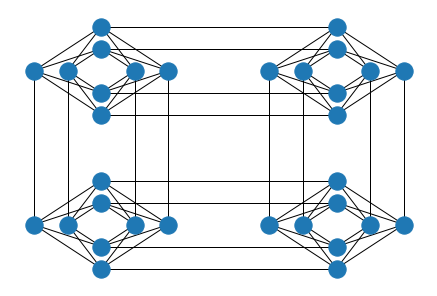

In [3]:
import matplotlib.pyplot as plt
import dwave_networkx as dnx

connectivity_structure = dnx.chimera_graph(2, 2)
dnx.draw_chimera(connectivity_structure)
plt.show()

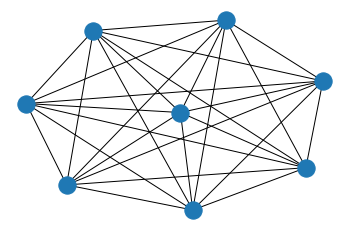

In [4]:
import networkx as nx
G = nx.complete_graph(8)
plt.axis('off') 
nx.draw_networkx(G, with_labels=False)

In [5]:
import minorminer
def get_max_chain_length(embedded_graph):
    
#    embedded_graph = minorminer.find_embedding(G.edges(), connectivity_structure.edges())
    max_chain_length = 0
    for _, chain in embedded_graph.items():
        if len(chain) > max_chain_length:
            max_chain_length = len(chain)

    return max_chain_length

In [6]:
import minorminer
def get_max_chain_length(embedded_graph):
    
#    embedded_graph = minorminer.find_embedding(G.edges(), connectivity_structure.edges())
    max_chain_length = 0
    for _, chain in embedded_graph.items():
        if len(chain) > max_chain_length:
            max_chain_length = len(chain)

    return max_chain_length

In [12]:
import minorminer

def get_min_chain_length(embedded_graph):
    
    min_chain_length = get_max_chain_length(embedded_graph)
    for _, chain in embedded_graph.items():
        if len(chain) < min_chain_length:
            min_chain_length = len(chain)
    return min_chain_length

longest_chain_length = []
shortest_chain_length = []
longest_chain_graph = []
shortest_chain_graph = []
for i in range(100):
    embedded_graph = minorminer.find_embedding(G.edges(), connectivity_structure.edges())
    max_chain_length1 = get_max_chain_length(embedded_graph)
    min_chain_length1 = get_min_chain_length(embedded_graph)
    for _, chain in embedded_graph.items():
        longest_chain_graph.append(embedded_graph)
        longest_chain_length.append(max_chain_length1)

        shortest_chain_graph.append(embedded_graph)
        shortest_chain_length.append(min_chain_length1)

longest = np.max(longest_chain_length)
print("Longest = ", longest)
ind = longest_chain_length.index(longest)
longest_chain = longest_chain_graph[ind]

shortest = np.min(shortest_chain_length)
print("Shortest = ", shortest)
ind1 = shortest_chain_length.index(shortest)
shortest_chain = shortest_chain_graph[ind1]

print(len(shortest_chain))
print(len(longest_chain))
print(get_max_chain_length(shortest_chain))
print(get_max_chain_length(longest_chain))



Longest =  4
Shortest =  2
8
8
3
4


In [13]:
assert len(shortest_chain) == 8
assert len(longest_chain) == 8
assert get_max_chain_length(shortest_chain) < get_max_chain_length(longest_chain)

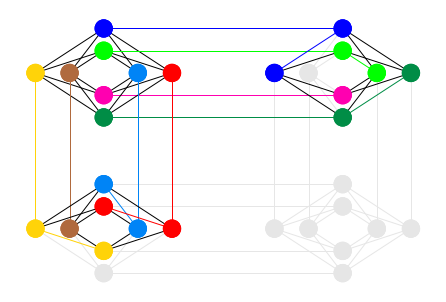

In [14]:
dnx.draw_chimera_embedding(connectivity_structure, shortest_chain)
plt.show()

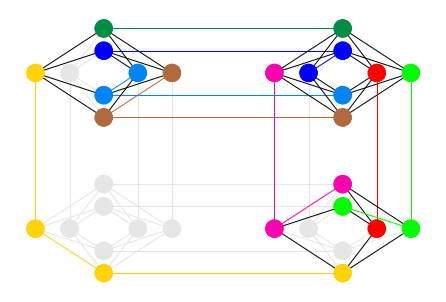

In [15]:
dnx.draw_chimera_embedding(connectivity_structure, longest_chain)
plt.show()